<a href="https://colab.research.google.com/github/sicario001/COL780-Project/blob/main/ReID-Slice_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1qgRXM0ZiX5_L0V-e1cr_clc2uHDFVcyz' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1qgRXM0ZiX5_L0V-e1cr_clc2uHDFVcyz" -O starter_code.zip && rm -rf /tmp/cookies.txt

--2021-11-30 00:43:04--  https://docs.google.com/uc?export=download&confirm=&id=1qgRXM0ZiX5_L0V-e1cr_clc2uHDFVcyz
Resolving docs.google.com (docs.google.com)... 173.194.79.138, 173.194.79.113, 173.194.79.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.79.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-9c-docs.googleusercontent.com/docs/securesc/cccfni89ofo6imc07migrj80dfrkoh93/a7kq21a2310jin6qlvnpfhg9qaekec7e/1638232950000/08196725501150479867/14829394685518067964Z/1qgRXM0ZiX5_L0V-e1cr_clc2uHDFVcyz?e=download [following]
--2021-11-30 00:43:15--  https://doc-0c-9c-docs.googleusercontent.com/docs/securesc/cccfni89ofo6imc07migrj80dfrkoh93/a7kq21a2310jin6qlvnpfhg9qaekec7e/1638232950000/08196725501150479867/14829394685518067964Z/1qgRXM0ZiX5_L0V-e1cr_clc2uHDFVcyz?e=download
Resolving doc-0c-9c-docs.googleusercontent.com (doc-0c-9c-docs.googleusercontent.com)... 142.250.153.132, 2a00:1450:4013:c16::84
Connecting to

In [195]:
!unzip -o starter_code

Archive:  starter_code.zip
2f4309617046ecaf0bd5d1862c42ed370a17f46c
  inflating: reid-col780-master/README.md  
  inflating: reid-col780-master/data/train/001/01_1.png  
  inflating: reid-col780-master/data/train/001/01_2.png  
  inflating: reid-col780-master/data/train/001/01_3.png  
  inflating: reid-col780-master/data/train/001/01_4.png  
  inflating: reid-col780-master/data/train/001/01_5.png  
  inflating: reid-col780-master/data/train/001/01_6.png  
  inflating: reid-col780-master/data/train/001/01_7.png  
  inflating: reid-col780-master/data/train/001/01_8.png  
  inflating: reid-col780-master/data/train/001/02_1.png  
  inflating: reid-col780-master/data/train/001/02_2.png  
  inflating: reid-col780-master/data/train/001/02_3.png  
  inflating: reid-col780-master/data/train/001/02_4.png  
  inflating: reid-col780-master/data/train/001/02_5.png  
  inflating: reid-col780-master/data/train/001/02_6.png  
  inflating: reid-col780-master/data/train/001/02_7.png  
  inflating: reid-

In [196]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import pandas as pd
from torchvision.io import read_image

In [197]:
import os
import sys
starter_path = os.path.abspath(os.getcwd())+'/reid-col780-master'
sys.path.insert(0, starter_path)

In [198]:
from utils import get_id

(128, 48, 3)


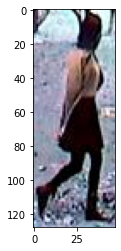

In [199]:
import cv2
imgSample = cv2.imread(starter_path+'/data/train/001/01_1.png')
plt.imshow(imgSample)
imgDim = imgSample.shape
print(imgDim)

### Load Dataset

In [200]:
def getCameraID(fileName):
  id = int(fileName.split('_')[0])
  return id

In [201]:
augment_dataset = False
trainImages = os.listdir(starter_path+'/data/train')
numClasses = len(trainImages)
trainImages = [[label, getCameraID(y), trainImages[label]+'/'+y] for label in range(len(trainImages)) for y in os.listdir(starter_path+'/data/train/'+trainImages[label]) ]
trainImagesCam1 = []
trainImagesCam2 = []
for i in range(len(trainImages)):
  img_path = os.path.join(starter_path+'/data/train', trainImages[i][2])
  image = read_image(img_path)
  # dataset augmentation
  if (augment_dataset):
    image_flipped = torch.flip(image, (2,))
  if trainImages[i][1]==1:
    trainImagesCam1.append([i, image])
    if (augment_dataset):
      trainImagesCam1.append([i, image_flipped])
  else:
    trainImagesCam2.append([i, image])
    if (augment_dataset):
      trainImagesCam2.append([i, image_flipped])
print(trainImages)
print(len(trainImages))

[[0, 2, '027/02_8.png'], [0, 2, '027/02_1.png'], [0, 1, '027/01_5.png'], [0, 1, '027/01_7.png'], [0, 1, '027/01_4.png'], [0, 1, '027/01_2.png'], [0, 2, '027/02_3.png'], [0, 2, '027/02_2.png'], [0, 2, '027/02_5.png'], [0, 1, '027/01_8.png'], [0, 1, '027/01_1.png'], [0, 2, '027/02_4.png'], [0, 2, '027/02_6.png'], [0, 1, '027/01_6.png'], [0, 1, '027/01_3.png'], [0, 2, '027/02_7.png'], [1, 2, '050/02_8.png'], [1, 2, '050/02_1.png'], [1, 1, '050/01_5.png'], [1, 1, '050/01_7.png'], [1, 1, '050/01_4.png'], [1, 1, '050/01_2.png'], [1, 2, '050/02_3.png'], [1, 2, '050/02_2.png'], [1, 2, '050/02_5.png'], [1, 1, '050/01_8.png'], [1, 1, '050/01_1.png'], [1, 2, '050/02_4.png'], [1, 2, '050/02_6.png'], [1, 1, '050/01_6.png'], [1, 1, '050/01_3.png'], [1, 2, '050/02_7.png'], [2, 2, '054/02_8.png'], [2, 2, '054/02_1.png'], [2, 1, '054/01_5.png'], [2, 1, '054/01_7.png'], [2, 1, '054/01_4.png'], [2, 1, '054/01_2.png'], [2, 2, '054/02_3.png'], [2, 2, '054/02_2.png'], [2, 2, '054/02_5.png'], [2, 1, '054/01_

In [202]:
transform_train_list = [
        transforms.ToPILImage(),
        transforms.Resize((128,48)),
        transforms.ToTensor(),
    ]
transform_train = transforms.Compose(transform_train_list)
target_transform = transforms.Lambda(lambda y: torch.zeros(numClasses, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

### Normalization

In [203]:
imgsCam1 = torch.stack([transform_train(x[1]) for x in trainImagesCam1], dim=3)
imgsCam2 = torch.stack([transform_train(x[1]) for x in trainImagesCam2], dim=3)
if not augment_dataset:
  imgsCam = torch.cat((imgsCam1, imgsCam2), 0)
  meanCam = imgsCam.view(3, -1).mean(dim=1)
  stdCam = imgsCam.view(3, -1).std(dim=1)
  meanCam1 = meanCam
  meanCam2 = meanCam
  stdCam1 = stdCam
  stdCam2 = stdCam
else:
  meanCam1 = imgsCam1.view(3, -1).mean(dim=1)
  meanCam2 = imgsCam2.view(3, -1).mean(dim=1)
  stdCam1 = imgsCam1.view(3, -1).std(dim=1)
  stdCam2 = imgsCam2.view(3, -1).std(dim=1)

In [204]:
tranformNormCam1 = transforms.Normalize(meanCam1, stdCam1)
tranformNormCam2 = transforms.Normalize(meanCam2, stdCam2)
trainImagesCam1 = [[x[0], tranformNormCam1(transform_train(x[1]))] for x in trainImagesCam1]
trainImagesCam2 = [[x[0], tranformNormCam2(transform_train(x[1]))] for x in trainImagesCam2]
for x in trainImagesCam1:
  trainImages[x[0]][2] = x[1]
for x in trainImagesCam2:
  trainImages[x[0]][2] = x[1]

### Custom Dataset

In [205]:
class CustomDataset(Dataset):
  def __init__(self, images, transform=None, target_transform=None):
        self.images = images
        self.transform = transform
        self.target_transform = target_transform

  def __len__(self):
        return len(self.images)

  def __getitem__(self, idx):
        label = self.images[idx][0]
        image = self.images[idx][2]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [206]:
dataset = CustomDataset(trainImages, target_transform=target_transform)


### Model

In [207]:
from torch.nn import Conv2d,Linear, Module, Sequential,BatchNorm2d,MaxPool2d
import torch.nn.functional as F

In [208]:
class ResidualBlock(Module):
  def __init__(self,in_channels,increase_dims=False,is_first=False):
        super(ResidualBlock, self).__init__()
        self.increase_dims = increase_dims
        self.is_first = is_first
        self.bn_0 = None
        self.conv_up = None
        out_channels = in_channels
        stride = 1
        if increase_dims:
          out_channels*=2
          stride*=2
          # self.conv_up = nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=1,stride=2,padding="same")
          self.conv_up = nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=1,stride=2)
        if not is_first:
          self.bn_0 = nn.Sequential(
              nn.BatchNorm2d(in_channels),
              nn.ELU()
          )
        if increase_dims:
          self.conv_1 = nn.Sequential(
              # nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=3,stride=stride,padding="same"),
              nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=3,stride=stride),
              nn.BatchNorm2d(out_channels),
              nn.ELU(),
              nn.Dropout(p=0.4)
          )
        else:
          self.conv_1 = nn.Sequential(
              nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=3,stride=stride,padding="same"),
              # nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=3,stride=stride),
              nn.BatchNorm2d(out_channels),
              nn.ELU(),
              nn.Dropout(p=0.4)
          )
        self.conv_2 = nn.Conv2d(in_channels=out_channels,out_channels=out_channels,kernel_size=3,stride=1,padding="same")
  def forward(self,x):
      if self.bn_0:
        y = self.bn_0(x)
      else:
        y = x
      residual = x
      if self.increase_dims:
        y = F.pad(y, (0, 1, 0, 1))
      out = self.conv_1(y)
      out = self.conv_2(out)
      if self.conv_up:
        residual = self.conv_up(residual)
      return out+residual

In [209]:
class BigNet(Module):   
    def __init__(self):
        super(BigNet, self).__init__()
        self.conv_1 = nn.Sequential(
          nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3,stride=1,padding="same"),
          nn.BatchNorm2d(32),
          nn.ELU()
        )
        self.conv_2 = nn.Sequential(
          nn.Conv2d(in_channels=32,out_channels=32,kernel_size=3,stride=1,padding="same"),
          nn.BatchNorm2d(32),
          nn.ELU()
        )
        # self.pool_3 = nn.MaxPool2d(kernel_size=3,stride=2,padding="same")
        self.pool_3 = nn.MaxPool2d(kernel_size=3,stride=2)
        
        self.residual_4 = ResidualBlock(in_channels=32,is_first=True)
        self.residual_5 = ResidualBlock(in_channels=32)
        self.residual_6 = ResidualBlock(in_channels=32,increase_dims=True)
        self.residual_7 = ResidualBlock(in_channels=64)
        self.residual_8 = ResidualBlock(in_channels=64,increase_dims=True)
        self.residual_9 = ResidualBlock(in_channels=128)

        self.dense_10 = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p=0.4),
            nn.Linear(in_features=128*4*6,out_features=32),
            nn.BatchNorm1d(32),
            nn.ELU()
        )
        

    # Defining the forward pass    
    def forward(self, x):
        out = self.conv_1(x)
        out = self.conv_2(out)
        out = F.pad(out, (0, 1, 0, 1))
        out = self.pool_3(out)
        out = self.residual_4(out)
        out = self.residual_5(out)
        out = self.residual_6(out)
        out = self.residual_7(out)
        out = self.residual_8(out)
        out = self.residual_9(out)
        out = self.dense_10(out)
        out = nn.functional.normalize(out,p=2,dim=1)
        # out = self.cosine_layer(out)
        return out

In [210]:
class SliceNet(Module):
  def __init__(self, numClasses = 2, inference = False):
    super(SliceNet, self).__init__()
    self.inference = inference
    self.numClasses = numClasses
    self.bignet = BigNet()
    self.cosine_layer = nn.utils.weight_norm(nn.Linear(in_features=128,out_features=numClasses,bias=False))

  def forward(self, x):
    x_slices = torch.split(x,split_size_or_sections=32,dim=2)
    # print(x_slices[0].shape)
    out_slices = list(map(self.bignet,x_slices))
    # print(out_slices[0].shape)
    out = torch.cat(out_slices,dim=1)
    # print(out.shape)
    if (not self.inference):
      out = self.cosine_layer(out)
    return out


### Training

In [211]:
from torch.utils.data import DataLoader, ConcatDataset
from torch.optim import Adam
from sklearn.model_selection import KFold

In [212]:
k_folds = 5
num_epochs = 150
batch_size = 16
torch.manual_seed(42)

In [213]:
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
    if hasattr(layer, 'reset_parameters'):
      # print(f'Reset trainable parameters of layer = {layer}')
      layer.reset_parameters()

Use GPU if available

In [214]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
def reset_net():
  global net
  net = SliceNet(numClasses = 62, inference = False)
  net.to(device)
reset_net()

In [215]:
def train_epoch(trainDataset,criterion,optimizer):

    num_minibatches = len(trainDataset)//batch_size
    running_loss = 0.0
    for i, data in enumerate(trainDataset, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        # if i % (num_minibatches//5) == (num_minibatches//5-1):    # print every 100 mini-batches
        #     print('[%d, %5d] loss: %.3f' %
        #           (epoch + 1, i + 1, running_loss / (num_minibatches//5)))
        #     running_loss = 0.0
    return running_loss

#### Test Set

In [216]:
def test(testDataset,criterion):
    correct = 0
    loss = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testDataset:
            images, labels = data[0].to(device), data[1].to(device)
            # calculate outputs by running images through the network
            y_pred = net(images)

            # cross entropy loss
            loss += criterion(y_pred,labels).item()

            # get labels
            y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(y_pred_softmax, dim = 1) 
            _, labels = torch.max(labels, dim = 1) 

            # get accuracy
            correct += (predicted == labels).sum().item()

            # total items
            total += labels.size(0)

    return loss,100 * correct / total

#### KFold

In [217]:
from sklearn.model_selection import KFold

In [56]:
kfold = KFold(n_splits=k_folds,shuffle=True,random_state=42)

In [ ]:
results = {}
# K-fold Cross Validation model evaluation
for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
  
  # Print
  print(f'FOLD {fold}')
  print('--------------------------------')
  
  # Sample elements randomly from a given list of ids, no replacement.
  train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
  test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
  
  # Define data loaders for training and testing data in this fold
  trainloader = torch.utils.data.DataLoader(
                    dataset, 
                    batch_size=batch_size, sampler=train_subsampler)
  testloader = torch.utils.data.DataLoader(
                    dataset,
                    batch_size=batch_size, sampler=test_subsampler)
  
  # reset
  reset_net()
  criterion = nn.CrossEntropyLoss()
  optimizer = Adam(net.parameters())
  # train
  for epoch in range(num_epochs):
    loss = train_epoch(trainloader,criterion,optimizer)
    val_loss,val_acc = test(testloader,criterion)
    print(f'Epoch\t{epoch+1}\tloss:{loss:.4f}\tval_loss:{val_loss:.4f}\tval_acc:{val_acc:.4f}')
  # test
  results[fold] = test(testloader,criterion)[1]
  print('--------------------------------')
  break

print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.keys())} %')

FOLD 0
--------------------------------
Epoch	1	loss:202.3319	val_loss:51.6461	val_acc:11.0553
Epoch	2	loss:191.5960	val_loss:49.4863	val_acc:22.6131
Epoch	3	loss:182.4078	val_loss:47.5310	val_acc:28.6432
Epoch	4	loss:174.8883	val_loss:46.0448	val_acc:34.6734
Epoch	5	loss:169.1554	val_loss:44.5853	val_acc:42.2111
Epoch	6	loss:164.3629	val_loss:43.8166	val_acc:45.2261
Epoch	7	loss:160.0820	val_loss:42.8952	val_acc:53.7688
Epoch	8	loss:156.6278	val_loss:41.9635	val_acc:57.7889
Epoch	9	loss:154.1015	val_loss:41.5036	val_acc:52.2613
Epoch	10	loss:151.9977	val_loss:40.9514	val_acc:62.8141
Epoch	11	loss:149.5930	val_loss:40.2694	val_acc:62.3116
Epoch	12	loss:148.3765	val_loss:39.9295	val_acc:61.3065
Epoch	13	loss:146.3223	val_loss:39.5069	val_acc:59.2965
Epoch	14	loss:144.0973	val_loss:39.1734	val_acc:61.3065
Epoch	15	loss:142.6188	val_loss:39.2116	val_acc:60.8040
Epoch	16	loss:141.1172	val_loss:38.7152	val_acc:61.8090
Epoch	17	loss:139.5054	val_loss:38.0824	val_acc:63.3166
Epoch	18	loss:138

Final Training on complete dataset

In [218]:
datasetLoader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle = True)
reset_net()
criterion = nn.CrossEntropyLoss()
optimizer = Adam(net.parameters())
for epoch in range(num_epochs):
  loss = train_epoch(datasetLoader,criterion,optimizer)
  print(f'Epoch\t{epoch+1}\tloss:{loss:.4f}')

Epoch	1	loss:251.0371
Epoch	2	loss:236.9776
Epoch	3	loss:223.7789
Epoch	4	loss:213.0849
Epoch	5	loss:204.4301
Epoch	6	loss:197.6755
Epoch	7	loss:192.8784
Epoch	8	loss:189.3098
Epoch	9	loss:184.9829
Epoch	10	loss:182.0720
Epoch	11	loss:179.5445
Epoch	12	loss:177.3520
Epoch	13	loss:174.7886
Epoch	14	loss:171.6690
Epoch	15	loss:168.6771
Epoch	16	loss:167.4519
Epoch	17	loss:164.4836
Epoch	18	loss:162.6117
Epoch	19	loss:160.4650
Epoch	20	loss:158.0036
Epoch	21	loss:156.3334
Epoch	22	loss:152.9092
Epoch	23	loss:151.7570
Epoch	24	loss:149.4162
Epoch	25	loss:147.4687
Epoch	26	loss:146.2320
Epoch	27	loss:144.0116
Epoch	28	loss:141.5041
Epoch	29	loss:139.6436
Epoch	30	loss:136.9497
Epoch	31	loss:136.0057
Epoch	32	loss:134.2086
Epoch	33	loss:131.3439
Epoch	34	loss:130.4368
Epoch	35	loss:128.3496
Epoch	36	loss:126.4939
Epoch	37	loss:123.7098
Epoch	38	loss:122.6870
Epoch	39	loss:120.4563
Epoch	40	loss:117.7570
Epoch	41	loss:116.0373
Epoch	42	loss:114.3394
Epoch	43	loss:113.7578
Epoch	44	loss:110.99

In [219]:
PATH = './final_model.pth'
torch.save(net.state_dict(), PATH)

### Evaluation

In [29]:
!apt install libomp-dev
!pip install faiss
!pip install faiss-gpu

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libomp5
Suggested packages:
  libomp-doc
The following NEW packages will be installed:
  libomp-dev libomp5
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 239 kB of archives.
After this operation, 804 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libomp5 amd64 5.0.1-1 [234 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libomp-dev amd64 5.0.1-1 [5,088 B]
Fetched 239 kB in 0s (2,621 kB/s)
Selecting previously unselected package libomp5:amd64.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../libomp5_5.0.1-1_amd64.deb ...
Unpacking libomp5:amd64 (5.0.1-1) ...
Selecting previously unselected package libomp-dev.
Preparing to unpack .../libomp-dev_5.0.1-1_amd64.deb ...
Unpacking libomp-dev (5.0.

In [220]:
# Evaluation 
# Acknowledgement: the code is based on Siddhant Kapil's repo on LA-Transformer

from __future__ import print_function

import os, sys
import faiss
import numpy as np

from PIL import Image
from tqdm.notebook import tqdm

import torch
import torch.nn as nn
from torch.nn import init
import torch.optim as optim
from torchvision import models
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset

from model import ReidModel, DummyModel
from utils import get_id
from metrics import rank1, rank5, calc_ap



# ### Set feature volume sizes (height, width, depth) 
# TODO: update with your model's feature length

batch_size = 1
H, W, D = 1, 1, 128 # for dummymodel we have feature volume 7x7x2048

# ### Load Model

# TODO: Uncomment the following lines to load the Implemented and trained Model

save_path = "final_model.pth"
model = SliceNet(numClasses = numClasses, inference=True)
model.load_state_dict(torch.load(save_path), strict=False)
model.eval()

# TODO: Comment out the dummy model
# model = DummyModel(batch_size, H, W, D)

# ### Data Loader for query and gallery

# TODO: For demo, we have resized to 224x224 during data augmentation
# You are free to use augmentations of your own choice
transform = [transforms.Resize((128,48)),
        transforms.ToTensor()]
transformCam1 = [
        transforms.Normalize(meanCam1, stdCam1)
    ]
transformCam2 = [
        transforms.Normalize(meanCam2, stdCam2)
    ]

data_transforms = {
        'basic': transforms.Compose( transform ),
        'Cam1': transforms.Compose( transformCam1 ),
        'Cam2': transforms.Compose(transformCam2)
    }


image_datasets = {}
data_dir = starter_path+"/data/val"

image_datasets['query'] = datasets.ImageFolder(os.path.join(data_dir, 'query'), data_transforms['basic'])
image_datasets['gallery'] = datasets.ImageFolder(os.path.join(data_dir, 'gallery'), data_transforms['basic'])
query_loader = DataLoader(dataset = image_datasets['query'], batch_size=batch_size, shuffle=False )
gallery_loader = DataLoader(dataset = image_datasets['gallery'], batch_size=batch_size, shuffle=False)

class_names = image_datasets['query'].classes


# ###  Extract Features
def extract_feature_alt(dataset):
  features =  torch.FloatTensor()
  cam_labels, _ = get_id(dataset.imgs)
  for i in tqdm(range(len(dataset))):
    if (cam_labels[i]=='1'):
      img = data_transforms['Cam1'](dataset[i][0])
    else:
      img = data_transforms['Cam2'](dataset[i][0])
    img = img[None, :]
    output = model(img)
    output = output[None, None, :]
    features = torch.cat((features, output.detach().cpu()), 0)
  print(features.shape)
  return features

def extract_feature(dataloaders):
    
    features =  torch.FloatTensor()
    count = 0
    idx = 0
    for data in tqdm(dataloaders):
        img, label = data
        # print(label)
        # Uncomment if using GPU for inference
        #img, label = img.cuda(), label.cuda()

        output = model(img) # (B, D, H, W) --> B: batch size, HxWxD: feature volume size
        n, c, h, w = img.size()
        
        count += n
        features = torch.cat((features, output.detach().cpu()), 0)
        idx += 1
    return features

# Extract Query Features

query_feature= extract_feature_alt(image_datasets['query'])

# Extract Gallery Features

gallery_feature = extract_feature_alt(image_datasets['gallery'])

# Retrieve labels

gallery_path = image_datasets['gallery'].imgs
query_path = image_datasets['query'].imgs

gallery_cam,gallery_label = get_id(gallery_path)
query_cam,query_label = get_id(query_path)


# ## Concat Averaged GELTs
concatenated_query_vectors = []
for query in tqdm(query_feature):
    fnorm = torch.norm(query, p=2, dim=0, keepdim=True)#*np.sqrt(H*W)
    query_norm = query.div(fnorm.expand_as(query))
    concatenated_query_vectors.append(query_norm.view((-1)))

concatenated_gallery_vectors = []
for gallery in tqdm(gallery_feature):
    fnorm = torch.norm(gallery, p=2, dim=0, keepdim=True)#*np.sqrt(H*W)
    gallery_norm = gallery.div(fnorm.expand_as(gallery))
    concatenated_gallery_vectors.append(gallery_norm.view((-1)))
  

# ## Calculate Similarity using FAISS

index = faiss.IndexIDMap(faiss.IndexFlatIP(H*W*D))

index.add_with_ids(np.array([t.numpy() for t in concatenated_gallery_vectors]),np.array(gallery_label))

def search(query: str, k=1):
    encoded_query = query.unsqueeze(dim=0).numpy()
    top_k = index.search(encoded_query, k)
    return top_k


# ### Evaluate 

rank1_score = 0
rank5_score = 0
ap = 0
count = 0
for query, label in zip(concatenated_query_vectors, query_label):
    count += 1
    label = label
    output = search(query, k=10)
    rank1_score += rank1(label, output) 
    rank5_score += rank5(label, output) 
    print("Correct: {}, Total: {}, Incorrect: {}".format(rank1_score, count, count-rank1_score), end="\r")
    ap += calc_ap(label, output)

print("Rank1: %.3f, Rank5: %.3f, mAP: %.3f"%(rank1_score/len(query_feature), 
                                             rank5_score/len(query_feature), 
                                             ap/len(query_feature)))    

  0%|          | 0/28 [00:00<?, ?it/s]

torch.Size([28, 1, 1, 128])


  0%|          | 0/181 [00:00<?, ?it/s]

torch.Size([181, 1, 1, 128])


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/181 [00:00<?, ?it/s]

Rank1: 0.964, Rank5: 1.000, mAP: 0.900
